Day 2: Added "CONNECTION_activities_talked_day_p3m", "CONNECTION_activities_talked_hobbies_p3m", "CONNECTION_activities_letter_or_email_p3m", "CONNECTION_activities_talked_family_p3m", "CONNECTION_activities_visited_family_p3m",

In [2]:
import pandas as pd

# Load the dataset
cols = pd.read_csv("https://raw.githubusercontent.com/pointOfive/stat130chat130/main/CP/var_names.csv")
data = pd.read_csv("https://raw.githubusercontent.com/pointOfive/stat130chat130/main/CP/CSCS_data_anon.csv",
                   na_values=["9999", "", " ", "Presented but no response", "NA"])

# Remove empty columns
empty = (data.isna().sum() == data.shape[0])
data = data[empty.index[~empty]]

# Keep only the recommended data
dataV2 = data[data.REMOVE_case == 'No'].copy()

# Select participants who are part of the cohort data
dataV2_cohort = dataV2[dataV2.SURVEY_cohort_participant].copy()

# Remove year 2023
dataV2_cohortV2 = dataV2_cohort[dataV2_cohort.SURVEY_collection_year != 2023].copy()

# Remove columns with too many missing values
missingness_limit = 100
columns2keep = dataV2_cohortV2.isna().sum() < missingness_limit
columns2keep = columns2keep.index[columns2keep]
dataV2_cohortV3 = dataV2_cohortV2[columns2keep].copy()

/tmp/ipykernel_70/715154101.py:5: DtypeWarning: Columns (129,408,630,671,689,978,1001,1002,1006,1007,1008,1080,1113,1115,1116,1117,1118,1119,1120,1121,1124,1125,1126,1127,1128,1213,1214,1215,1216,1217,1218,1263,1266,1342,1343,1344,1345,1346,1347,1348,1349,1390,1391,1393,1439,1442,1463,1546,1549,1552,1555,1558,1561) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("https://raw.githubusercontent.com/pointOfive/stat130chat130/main/CP/CSCS_data_anon.csv",


In [3]:
# Select only the requested columns
selected_columns = [
    "CONNECTION_activities_talked_day_p3m",
    "CONNECTION_activities_talked_hobbies_p3m",
    "CONNECTION_activities_letter_or_email_p3m",
    "CONNECTION_activities_talked_family_p3m",
    "CONNECTION_activities_visited_family_p3m",
    
    
    ##Day 2##
    "CONNECTION_activities_checked_in_p3m",
    "CONNECTION_activities_computer_games_p3m",
    "CONNECTION_activities_discussion_group_p3m",
    "CONNECTION_activities_group_video_chat_p3m",
    "CONNECTION_activities_onlinegames_p3m",
    "CONNECTION_activities_phone_p3m",
    "CONNECTION_activities_text_or_messaged_p3m",
    "CONNECTION_activities_video_chat_p3m",
    "CONNECTION_activities_board_games_p3m",
    

    "CONNECTION_activities_church_p3m",
    "CONNECTION_activities_coffee_p3m",
    "CONNECTION_activities_community_p3m",
    "CONNECTION_activities_helped_p3m",
    "CONNECTION_activities_hug_p3m",
    
    'WELLNESS_subjective_happiness_scale_score',
    'WELLNESS_phq_score', 
    'WELLNESS_gad_score'
]

filtered_data = dataV2_cohortV3[selected_columns]

filtered_data = filtered_data.dropna(
    subset=["WELLNESS_subjective_happiness_scale_score", "WELLNESS_phq_score", "WELLNESS_gad_score"]
)

filtered_data.fillna("Not in the past three months", inplace=True)

# The resulting data
filtered_data


,CONNECTION_activities_talked_day_p3m,CONNECTION_activities_talked_hobbies_p3m,CONNECTION_activities_letter_or_email_p3m,CONNECTION_activities_talked_family_p3m,CONNECTION_activities_visited_family_p3m,CONNECTION_activities_checked_in_p3m,CONNECTION_activities_computer_games_p3m,CONNECTION_activities_discussion_group_p3m,CONNECTION_activities_group_video_chat_p3m,CONNECTION_activities_onlinegames_p3m,...,CONNECTION_activities_video_chat_p3m,CONNECTION_activities_board_games_p3m,CONNECTION_activities_church_p3m,CONNECTION_activities_coffee_p3m,CONNECTION_activities_community_p3m,CONNECTION_activities_helped_p3m,CONNECTION_activities_hug_p3m,WELLNESS_subjective_happiness_scale_score,WELLNESS_phq_score,WELLNESS_gad_score
19,Weekly,Less than monthly,Less than monthly,Weekly,A few times a month,Daily or almost daily,Not in the past three months,Monthly,Less than monthly,Not in the past three months,...,Less than monthly,Not in the past three months,Not in the past three months,A few times a week,Not in the past three months,Less than monthly,Daily or almost daily,5.00,1.0,0.0
21,Weekly,Less than monthly,Less than monthly,Weekly,Monthly,Less than monthly,Not in the past three months,Not in the past three months,Not in the past three months,Not in the past three months,...,Not in the past three months,Less than monthly,Not in the past three months,Less than monthly,Not in the past three months,Not in the past three months,Daily or almost daily,5.25,1.0,0.0
71,A few times a week,Not in the past three months,Daily or almost daily,Daily or almost daily,A few times a week,A few times a week,Not in the past three months,Not in the past three months,Not in the past three months,Not in the past three months,...,A few times a week,Not in the past three months,Not in the past three months,Weekly,Not in the past three months,Not in the past three months,A few times a week,6.00,0.0,0.0
77,Weekly,A few times a week,Less than monthly,Weekly,Monthly,A few times a month,Not in the past three months,A few times a month,Not in the past three months,Weekly,...,Less than monthly,Not in the past three months,Not in the past three months,A few times a month,Not in the past three months,Monthly,A few times a month,6.00,0.0,0.0
78,A few times a week,A few times a week,Weekly,A few times a week,A few times a month,Weekly,Not in the past three months,A few times a month,Not in the past three months,Weekly,...,Less than monthly,Not in the past three months,Not in the past three months,A few times a month,Not in the past three months,A few times a month,Daily or almost daily,6.00,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11379,Weekly,Daily or almost daily,Monthly,Weekly,Not in the past three months,A few times a week,Not in the past three months,Monthly,Monthly,Not in the past three months,...,A few times a week,Not in the past three months,Not in the past three months,Weekly,Weekly,Monthly,Not in the past three months,3.00,3.0,4.0
11380,A few times a week,A few times a week,A few times a month,Weekly,Not in the past three months,Weekly,Not in the past three months,Monthly,A few times a month,Not in the past three months,...,A few times a month,A few times a month,Not in the past three months,A few times a week,A few times a week,Weekly,A few times a month,3.50,3.0,2.0
11412,A few times a week,A few times a week,Weekly,Daily or almost daily,Weekly,A few times a week,Not in the past three months,Weekly,Monthly,Not in the past three months,...,Weekly,Less than monthly,Not in the past three months,A few times a week,Less than monthly,Monthly,Daily or almost daily,4.75,1.0,2.0
11428,Weekly,Weekly,Not in the past three months,Weekly,Monthly,A few times a month,Not in the past three months,Not in the past three months,Not in the past three months,Not in the past three months,...,A few times a week,Not in the past three months,Less than monthly,Less than monthly,Not in the past three months,Not in the past three m

## Removed all the NAN in 'WELLNESS_subjective_happiness_scale_score', 'WELLNESS_phq_score', and 'WELLNESS_gad_score'

## Change the NAN in other columns into Not in the past three months

## filtered_data is our dataset

In [4]:
for col in filtered_data.columns:
    col_summary = filtered_data[col].value_counts(dropna=False)
    if len(col_summary)<11:
        print(col_summary, "\n")
    else:
        print(col, filtered_data[col].shape, "\n")

CONNECTION_activities_talked_day_p3m
Daily or almost daily           241
A few times a week              233
Weekly                          129
A few times a month              79
Less than monthly                52
Monthly                          37
Not in the past three months     26
Name: count, dtype: int64 

CONNECTION_activities_talked_hobbies_p3m
Weekly                          162
A few times a week              160
A few times a month             128
Less than monthly               106
Daily or almost daily           100
Not in the past three months     74
Monthly                          67
Name: count, dtype: int64 

CONNECTION_activities_letter_or_email_p3m
Not in the past three months    209
Less than monthly               165
A few times a month             134
A few times a week               86
Weekly                           78
Monthly                          65
Daily or almost daily            60
Name: count, dtype: int64 

CONNECTION_activities_talked_family_p3m


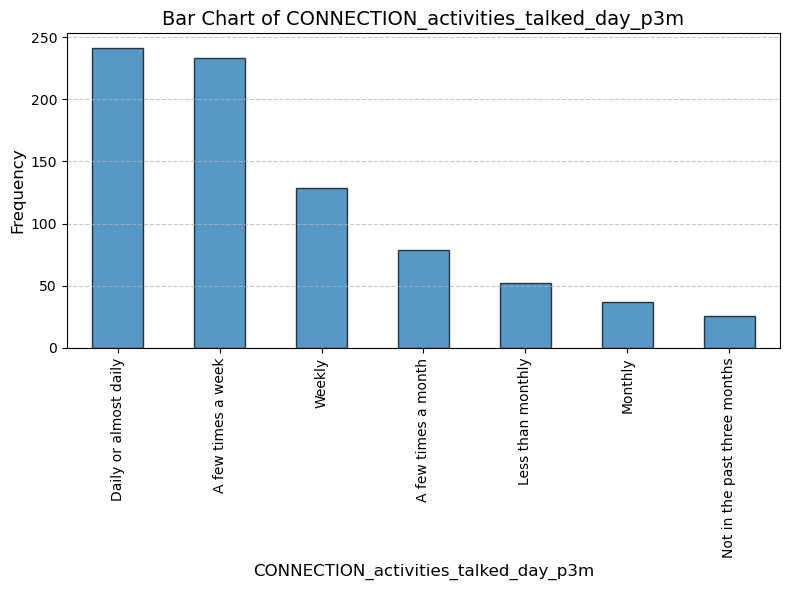

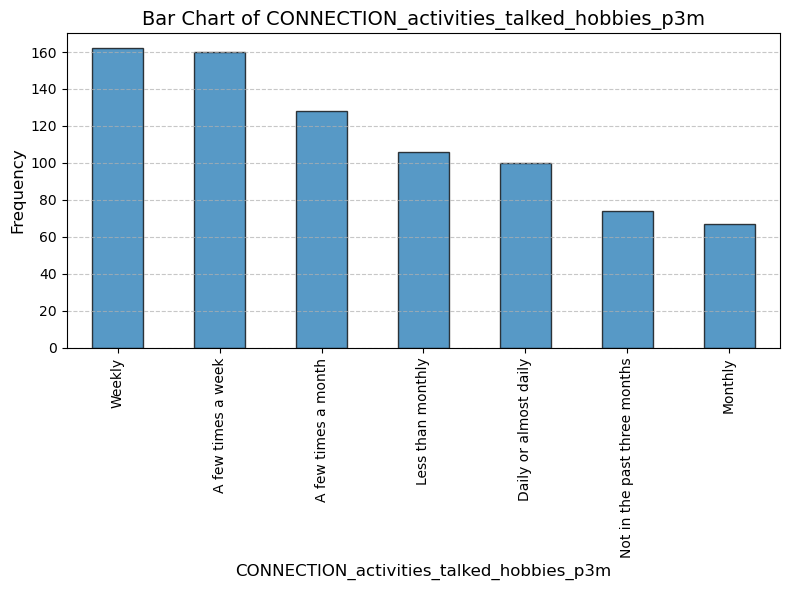

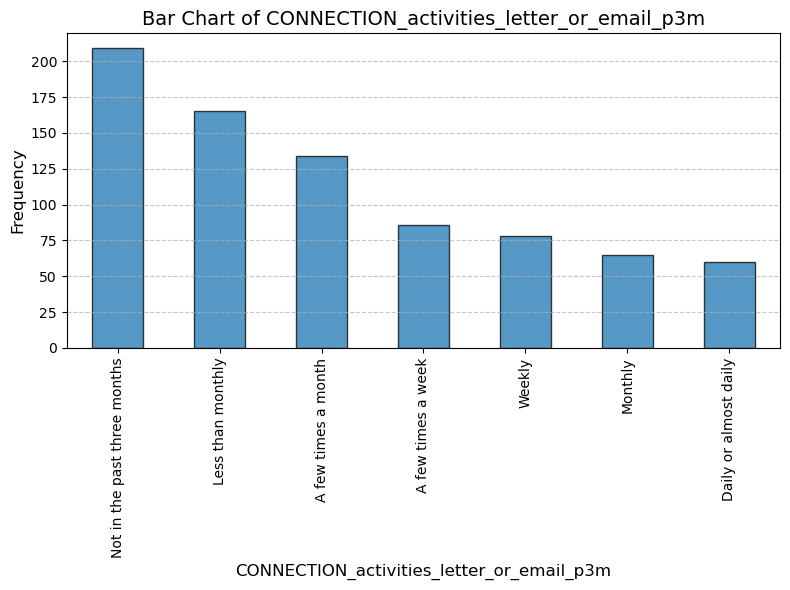

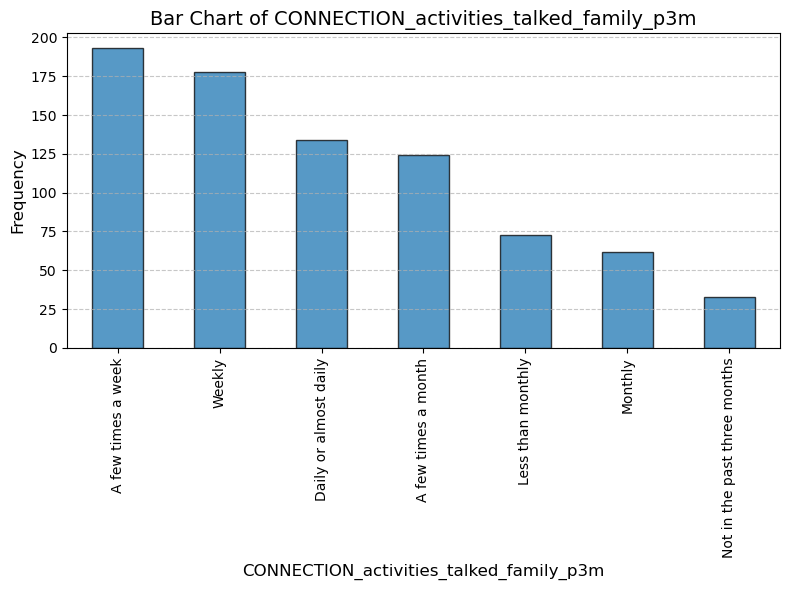

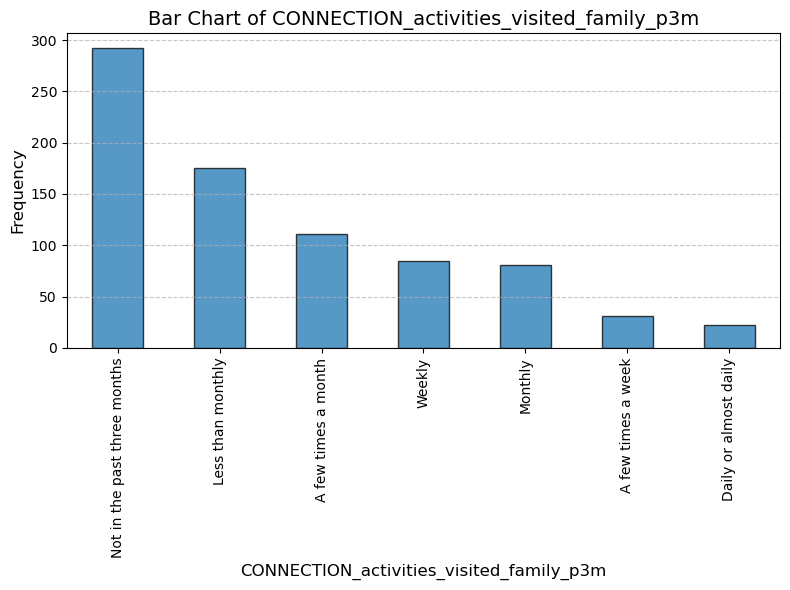

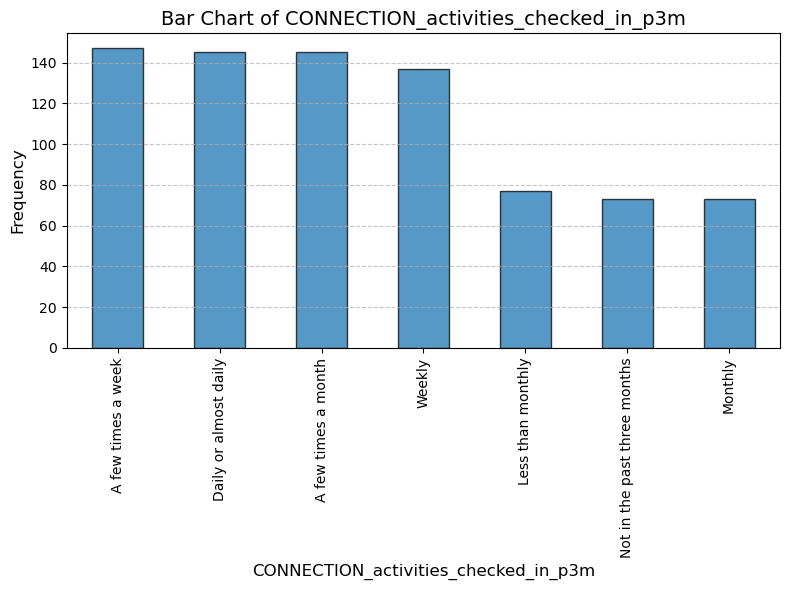

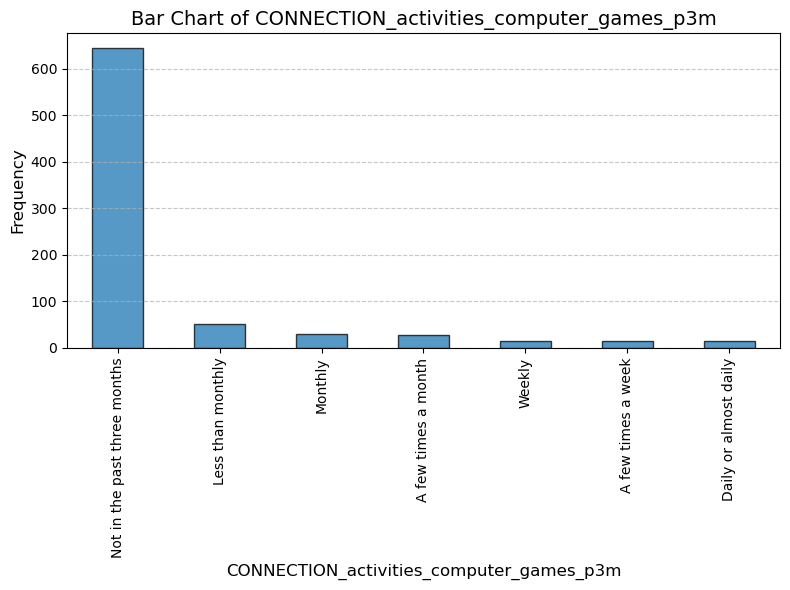

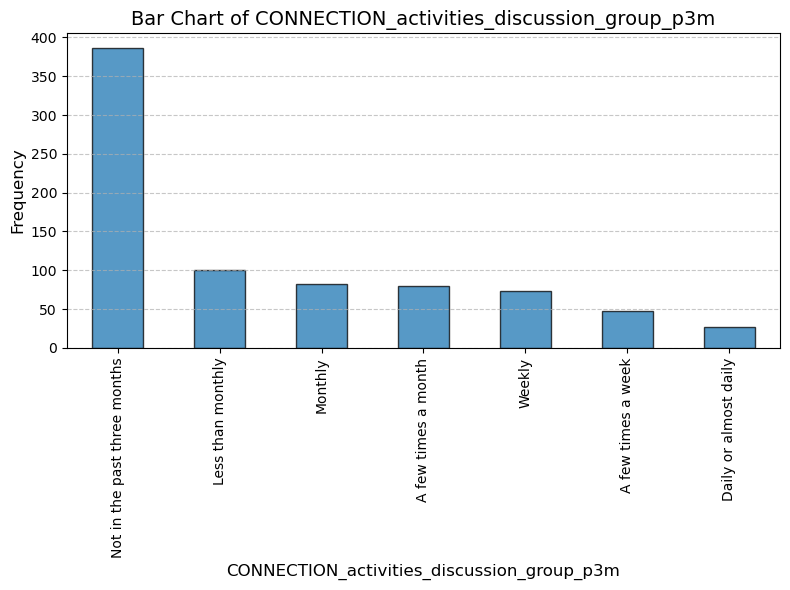

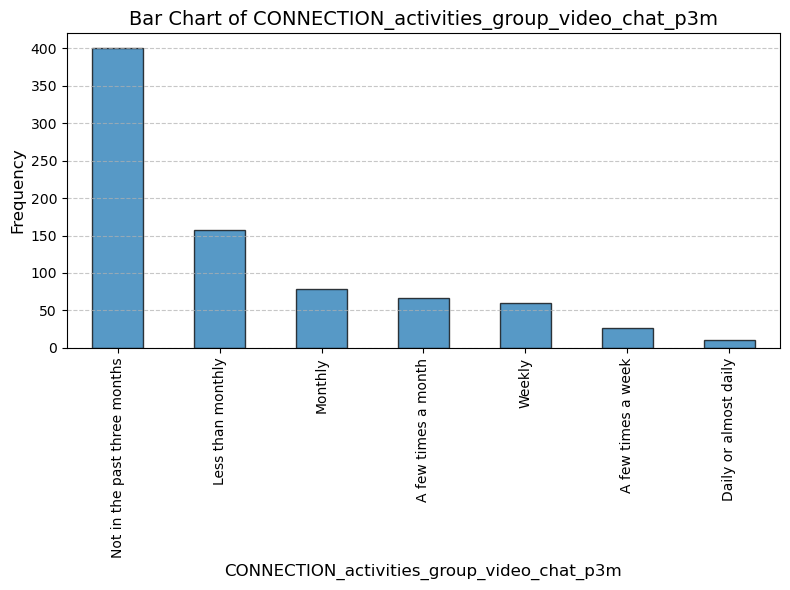

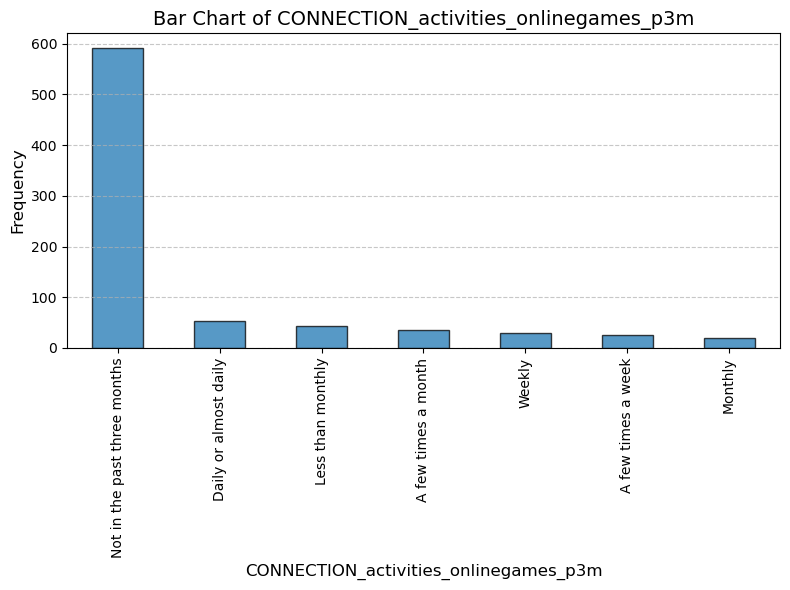

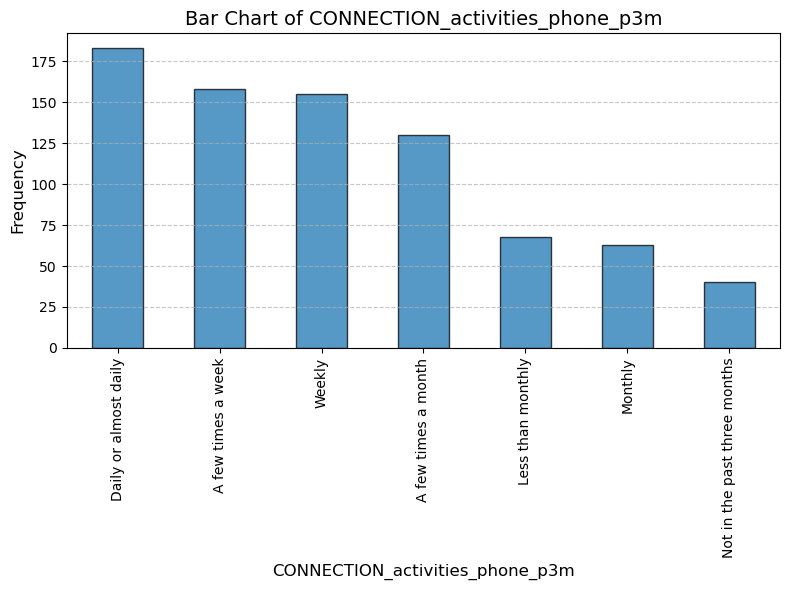

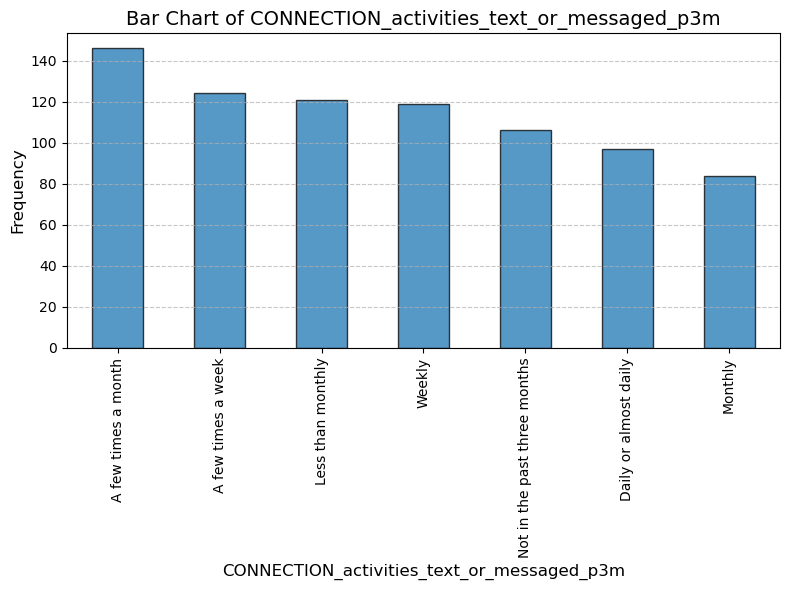

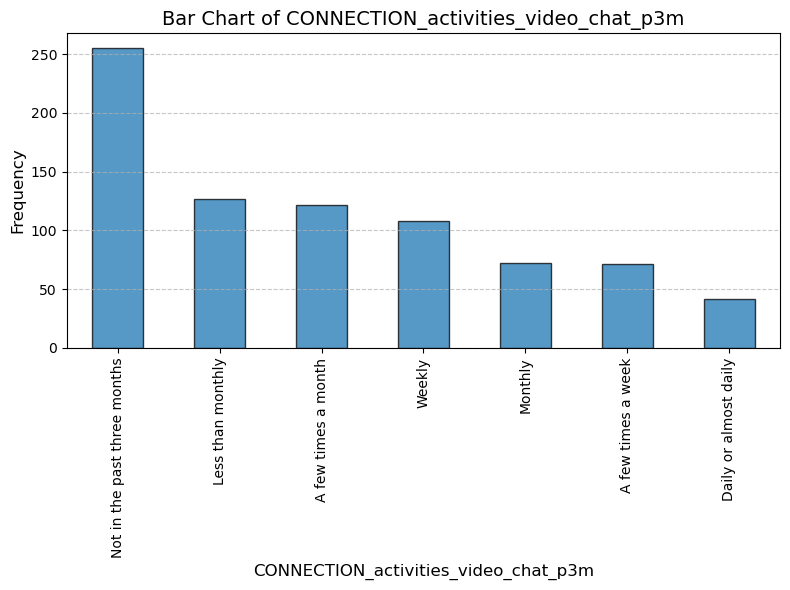

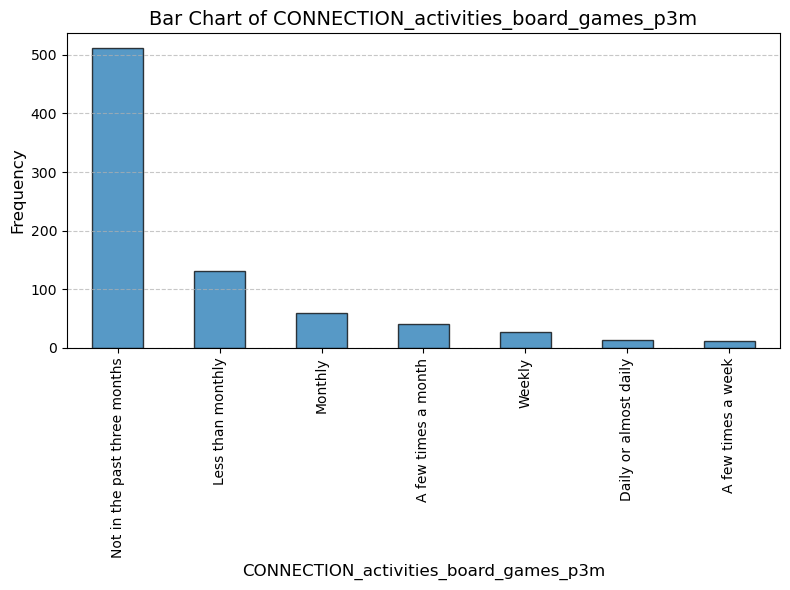

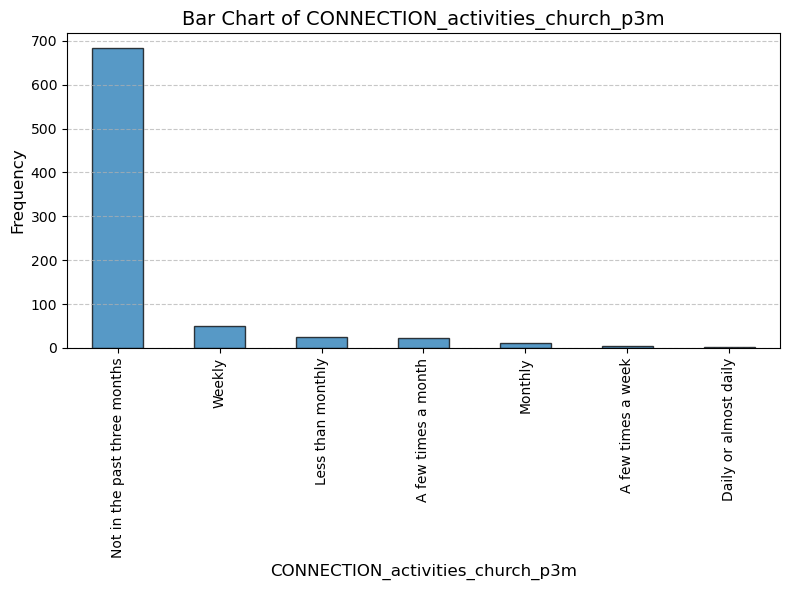

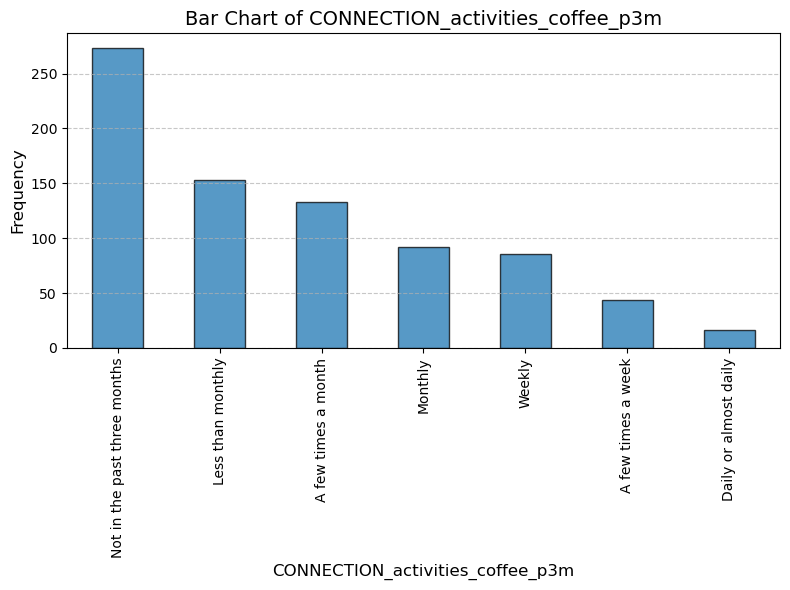

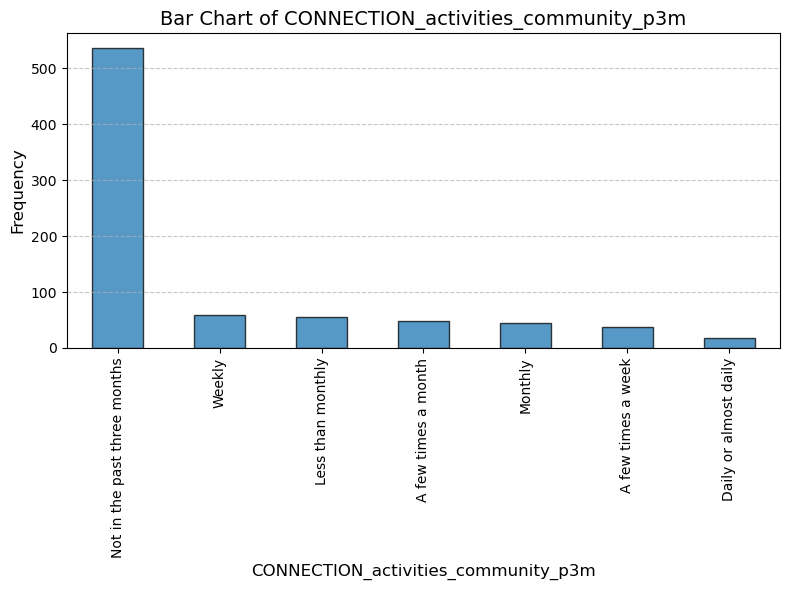

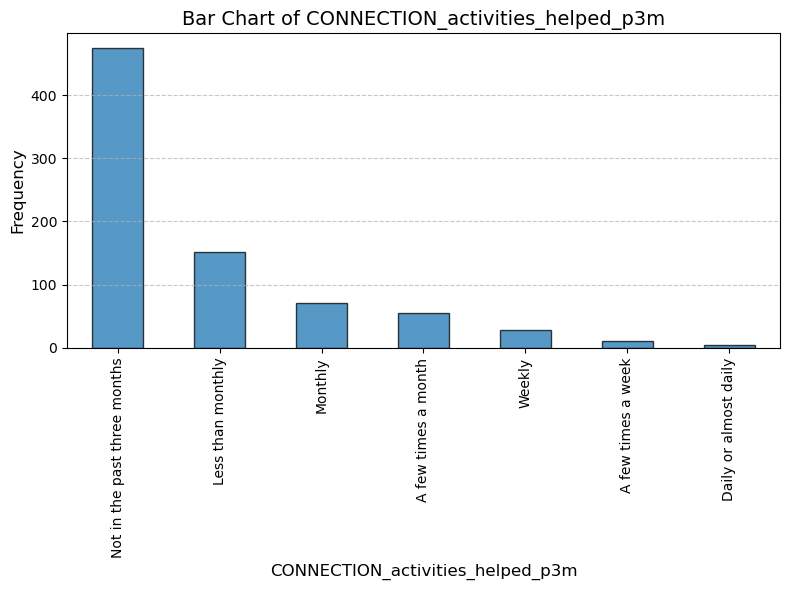

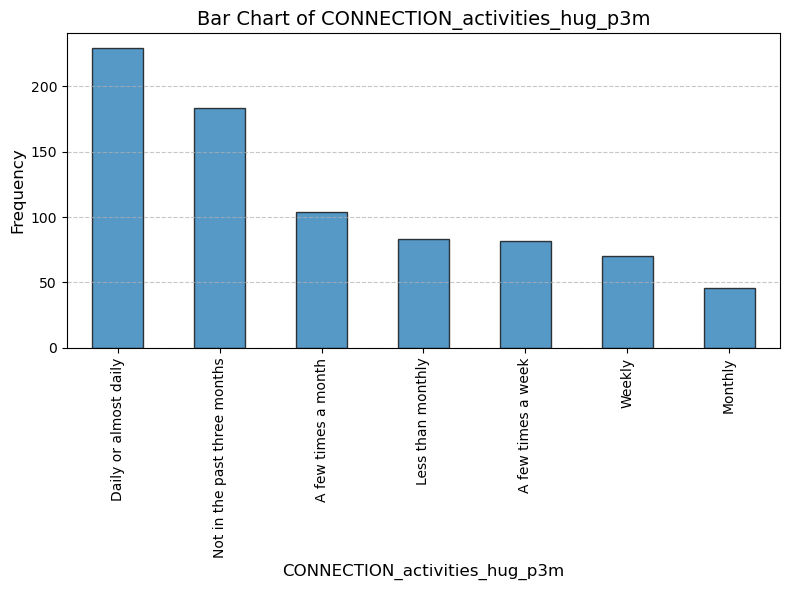

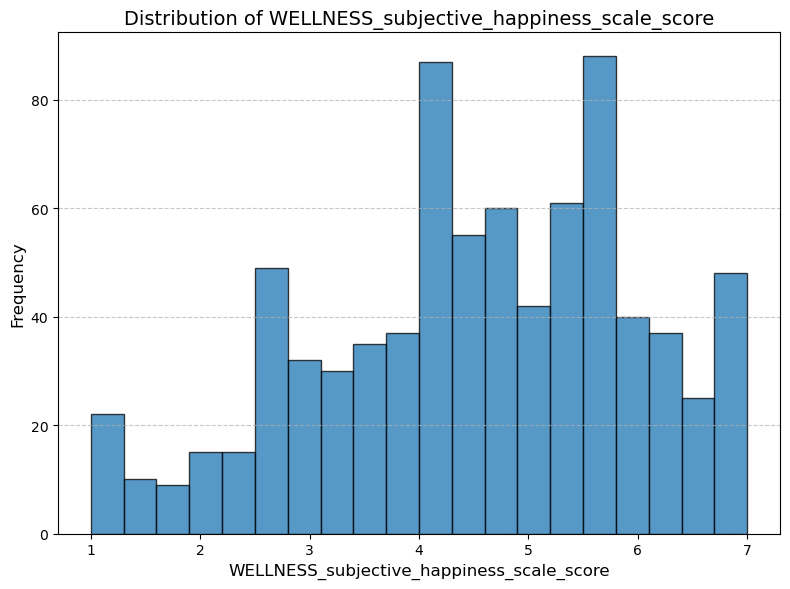

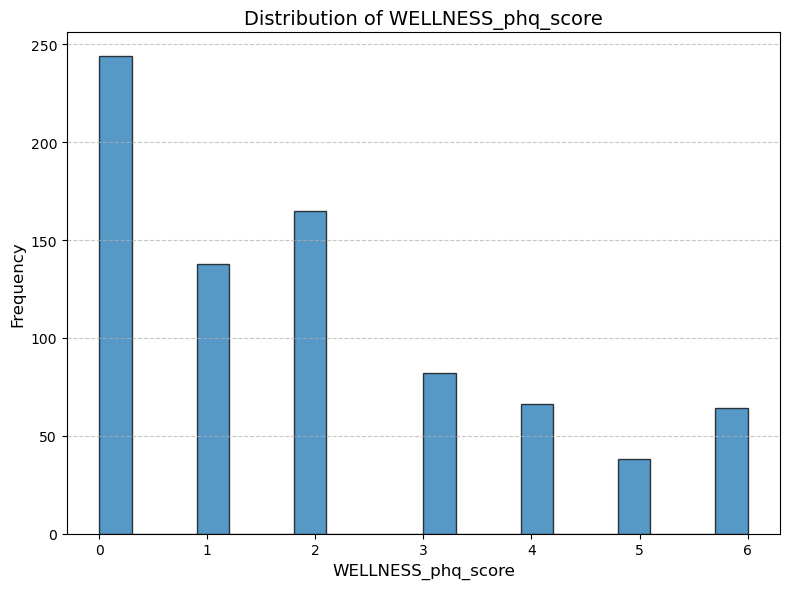

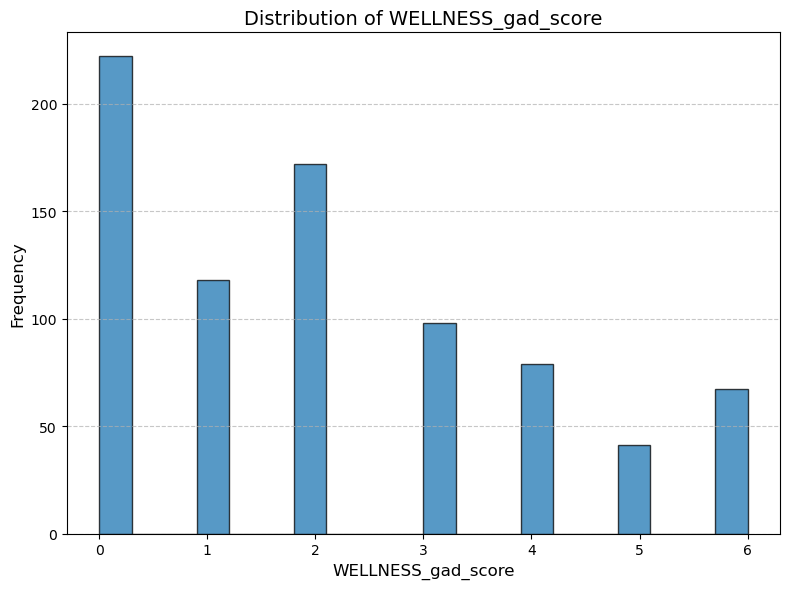

In [5]:
import matplotlib.pyplot as plt

# Function to create visualizations for each variable
def visualize_variable(data, column_name):
    plt.figure(figsize=(8, 6))
    if data[column_name].dtype in ['float64', 'int64']:
        # For numerical data, use histogram
        data[column_name].dropna().plot(kind='hist', bins=20, alpha=0.75, edgecolor='black')
        plt.title(f"Distribution of {column_name}", fontsize=14)
        plt.xlabel(column_name, fontsize=12)
        plt.ylabel("Frequency", fontsize=12)
    else:
        # For categorical data, use bar chart
        data[column_name].value_counts().plot(kind='bar', alpha=0.75, edgecolor='black')
        plt.title(f"Bar Chart of {column_name}", fontsize=14)
        plt.xlabel(column_name, fontsize=12)
        plt.ylabel("Frequency", fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Loop through each column in the filtered dataset and create a visualization
for column in filtered_data.columns:
    visualize_variable(filtered_data, column)


## independent variables(x)

"CONNECTION_activities_checked_in_p3m":  In the PAST THREE MONTH, how often have you... - sent a text/private message to someone just to check in?

"CONNECTION_activities_computer_games_p3m": In the PAST THREE MONTH, how often have you... - played a computer or console (e.g., Wii, Xbox, PlayStation) game with others?

"CONNECTION_activities_discussion_group_p3m": In the PAST THREE MONTH, how often have you... - participated in an online discussion group?

"CONNECTION_activities_group_video_chat_p3m": In the PAST THREE MONTH, how often have you... - had a video chat with a GROUP of friends or family?

"CONNECTION_activities_onlinegames_p3m": In the PAST THREE MONTH, how often have you... - played an online game with others?

"CONNECTION_activities_phone_p3m": In the PAST THREE MONTH, how often have you... - had a phone conversation with a friend or family member?

"CONNECTION_activities_text_or_messaged_p3m": In the PAST THREE MONTH, how often have you... - received a text/private message from someone who was checking in with you?

"CONNECTION_activities_video_chat_p3m": In the PAST THREE MONTH, how often have you... - had a video chat with a friend or family member?

In [6]:
category_map = {
    "Not in the past three months": "NAFreq",
    "Less than monthly": "NAFreq",
    "Monthly": "NAFreq",
    "A few times a month": "Freq",
    "Weekly": "Freq",
    "A few times a week": "Freq",
    "Daily or almost daily": "Freq"
}

In [7]:
dependent_variables = filtered_data[[
    "CONNECTION_activities_checked_in_p3m",
    "CONNECTION_activities_computer_games_p3m",
    "CONNECTION_activities_discussion_group_p3m",
    "CONNECTION_activities_group_video_chat_p3m",
    "CONNECTION_activities_onlinegames_p3m",
    "CONNECTION_activities_phone_p3m",
    "CONNECTION_activities_text_or_messaged_p3m",
    "CONNECTION_activities_video_chat_p3m",
    "CONNECTION_activities_board_games_p3m",
    "CONNECTION_activities_church_p3m",
    "CONNECTION_activities_coffee_p3m",
    "CONNECTION_activities_community_p3m",
    "CONNECTION_activities_helped_p3m",
    "CONNECTION_activities_hug_p3m",
    
    "CONNECTION_activities_talked_day_p3m",
    "CONNECTION_activities_talked_hobbies_p3m",
    "CONNECTION_activities_letter_or_email_p3m",
    "CONNECTION_activities_talked_family_p3m",
    "CONNECTION_activities_visited_family_p3m",
]]
dependent_variables

,CONNECTION_activities_checked_in_p3m,CONNECTION_activities_computer_games_p3m,CONNECTION_activities_discussion_group_p3m,CONNECTION_activities_group_video_chat_p3m,CONNECTION_activities_onlinegames_p3m,CONNECTION_activities_phone_p3m,CONNECTION_activities_text_or_messaged_p3m,CONNECTION_activities_video_chat_p3m,CONNECTION_activities_board_games_p3m,CONNECTION_activities_church_p3m,CONNECTION_activities_coffee_p3m,CONNECTION_activities_community_p3m,CONNECTION_activities_helped_p3m,CONNECTION_activities_hug_p3m,CONNECTION_activities_talked_day_p3m,CONNECTION_activities_talked_hobbies_p3m,CONNECTION_activities_letter_or_email_p3m,CONNECTION_activities_talked_family_p3m,CONNECTION_activities_visited_family_p3m
19,Daily or almost daily,Not in the past three months,Monthly,Less than monthly,Not in the past three months,A few times a week,Weekly,Less than monthly,Not in the past three months,Not in the past three months,A few times a week,Not in the past three months,Less than monthly,Daily or almost daily,Weekly,Less than monthly,Less than monthly,Weekly,A few times a month
21,Less than monthly,Not in the past three months,Not in the past three months,Not in the past three months,Not in the past three months,Daily or almost daily,Weekly,Not in the past three months,Less than monthly,Not in the past three months,Less than monthly,Not in the past three months,Not in the past three months,Daily or almost daily,Weekly,Less than monthly,Less than monthly,Weekly,Monthly
71,A few times a week,Not in the past three months,Not in the past three months,Not in the past three months,Not in the past three months,Daily or almost daily,A few times a week,A few times a week,Not in the past three months,Not in the past three months,Weekly,Not in the past three months,Not in the past three months,A few times a week,A few times a week,Not in the past three months,Daily or almost daily,Daily or almost daily,A few times a week
77,A few times a month,Not in the past three months,A few times a month,Not in the past three months,Weekly,A few times a week,A few times a month,Less than monthly,Not in the past three months,Not in the past three months,A few times a month,Not in the past three months,Monthly,A few times a month,Weekly,A few times a week,Less than monthly,Weekly,Monthly
78,Weekly,Not in the past three months,A few times a month,Not in the past three months,Weekly,Weekly,Weekly,Less than monthly,Not in the past three months,Not in the past three months,A few times a month,Not in the past three months,A few times a month,Daily or almost daily,A few times a week,A few times a week,Weekly,A few times a week,A few times a month
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11379,A few times a week,Not in the past three months,Monthly,Monthly,Not in the past three months,A few times a month,Less than monthly,A few times a week,Not in the past three months,Not in the past three months,Weekly,Weekly,Monthly,Not in the past three months,Weekly,Daily or almost daily,Monthly,Weekly,Not in the past three months
11380,Weekly,Not in the past three months,Monthly,A few times a month,Not in the past three months,Less than monthly,Weekly,A few times a month,A few times a month,Not in the past three months,A few times a week,A few times a week,Weekly,A few times a month,A few times a week,A few times a week,A few times a month,Weekly,Not in the past three months
11412,A few times a week,Not in the past three months,Weekly,Monthly,Not in the past three months,Daily or almost daily,Daily or almost daily,Weekly,Less than monthly,Not in the past three months,A few times a week,Less than monthly,Monthly,Daily or almost daily,A few times a week,A few times a week,Weekly,Daily or almost daily,Weekly
11428,A few times a month,Not in the past three months,Not in the past three months,Not in the past three months,Not in the past three months,Daily or almost daily,Daily or almost daily,A few times a week,Not in the past three months,Les

In [8]:
Online_dependent_variables = dependent_variables[[
    "CONNECTION_activities_checked_in_p3m",
    "CONNECTION_activities_computer_games_p3m",
    "CONNECTION_activities_discussion_group_p3m",
    "CONNECTION_activities_group_video_chat_p3m",
    "CONNECTION_activities_onlinegames_p3m",
    "CONNECTION_activities_phone_p3m",
    "CONNECTION_activities_text_or_messaged_p3m",
    "CONNECTION_activities_video_chat_p3m",
    
    "CONNECTION_activities_letter_or_email_p3m",
]]

Online_dependent_variables.columns = Online_dependent_variables.columns.str.replace('CONNECTION_activities_', '', regex=False)

Online_dependent_variables

,checked_in_p3m,computer_games_p3m,discussion_group_p3m,group_video_chat_p3m,onlinegames_p3m,phone_p3m,text_or_messaged_p3m,video_chat_p3m,letter_or_email_p3m
19,Daily or almost daily,Not in the past three months,Monthly,Less than monthly,Not in the past three months,A few times a week,Weekly,Less than monthly,Less than monthly
21,Less than monthly,Not in the past three months,Not in the past three months,Not in the past three months,Not in the past three months,Daily or almost daily,Weekly,Not in the past three months,Less than monthly
71,A few times a week,Not in the past three months,Not in the past three months,Not in the past three months,Not in the past three months,Daily or almost daily,A few times a week,A few times a week,Daily or almost daily
77,A few times a month,Not in the past three months,A few times a month,Not in the past three months,Weekly,A few times a week,A few times a month,Less than monthly,Less than monthly
78,Weekly,Not in the past three months,A few times a month,Not in the past three months,Weekly,Weekly,Weekly,Less than monthly,Weekly
...,...,...,...,...,...,...,...,...,...
11379,A few times a week,Not in the past three months,Monthly,Monthly,Not in the past three months,A few times a month,Less than monthly,A few times a week,Monthly
11380,Weekly,Not in the past three months,Monthly,A few times a month,Not in the past three months,Less than monthly,Weekly,A few times a month,A few times a month
11412,A few times a week,Not in the past three months,Weekly,Monthly,Not in the past three months,Daily or almost daily,Daily or almost daily,Weekly,Weekly
11428,A few times a month,Not in the past three months,Not in the past three months,Not in the past three months,Not in the past three months,Daily or almost daily,Daily or almost daily,A few times a week,Not in the past three months


In [9]:
# Apply the mapping to each of the categorical columns in Online_dependent_variables
for col in Online_dependent_variables.columns:
    Online_dependent_variables[col] = Online_dependent_variables[col].replace(category_map)
    Online_dependent_variables[col] = Online_dependent_variables[col].astype('category')


# Check the transformed DataFrame
Online_dependent_variables

/tmp/ipykernel_70/485551678.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Online_dependent_variables[col] = Online_dependent_variables[col].replace(category_map)
/tmp/ipykernel_70/485551678.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Online_dependent_variables[col] = Online_dependent_variables[col].astype('category')
/tmp/ipykernel_70/485551678.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

,checked_in_p3m,computer_games_p3m,discussion_group_p3m,group_video_chat_p3m,onlinegames_p3m,phone_p3m,text_or_messaged_p3m,video_chat_p3m,letter_or_email_p3m
19,Freq,NAFreq,NAFreq,NAFreq,NAFreq,Freq,Freq,NAFreq,NAFreq
21,NAFreq,NAFreq,NAFreq,NAFreq,NAFreq,Freq,Freq,NAFreq,NAFreq
71,Freq,NAFreq,NAFreq,NAFreq,NAFreq,Freq,Freq,Freq,Freq
77,Freq,NAFreq,Freq,NAFreq,Freq,Freq,Freq,NAFreq,NAFreq
78,Freq,NAFreq,Freq,NAFreq,Freq,Freq,Freq,NAFreq,Freq
...,...,...,...,...,...,...,...,...,...
11379,Freq,NAFreq,NAFreq,NAFreq,NAFreq,Freq,NAFreq,Freq,NAFreq
11380,Freq,NAFreq,NAFreq,Freq,NAFreq,NAFreq,Freq,Freq,Freq
11412,Freq,NAFreq,Freq,NAFreq,NAFreq,Freq,Freq,Freq,Freq
11428,Freq,NAFreq,NAFreq,NAFreq,NAFreq,Freq,Freq,Freq,NAFreq


In [10]:
Offline_dependent_variables = dependent_variables[[
    "CONNECTION_activities_board_games_p3m",
    "CONNECTION_activities_church_p3m",
    "CONNECTION_activities_coffee_p3m",
    "CONNECTION_activities_community_p3m",
    "CONNECTION_activities_helped_p3m",
    "CONNECTION_activities_hug_p3m",
    
    "CONNECTION_activities_talked_family_p3m",
    "CONNECTION_activities_visited_family_p3m",
]]

Offline_dependent_variables.columns = Offline_dependent_variables.columns.str.replace('CONNECTION_activities_', '', regex=False)


# Apply the mapping to each of the categorical columns in Online_dependent_variables
for col in Offline_dependent_variables.columns:
    Offline_dependent_variables[col] = Offline_dependent_variables[col].replace(category_map)
    Offline_dependent_variables[col] = Offline_dependent_variables[col].astype('category')


# Check the transformed DataFrame
Offline_dependent_variables

/tmp/ipykernel_70/4133885577.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Offline_dependent_variables[col] = Offline_dependent_variables[col].replace(category_map)
/tmp/ipykernel_70/4133885577.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Offline_dependent_variables[col] = Offline_dependent_variables[col].astype('category')
/tmp/ipykernel_70/4133885577.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

,board_games_p3m,church_p3m,coffee_p3m,community_p3m,helped_p3m,hug_p3m,talked_family_p3m,visited_family_p3m
19,NAFreq,NAFreq,Freq,NAFreq,NAFreq,Freq,Freq,Freq
21,NAFreq,NAFreq,NAFreq,NAFreq,NAFreq,Freq,Freq,NAFreq
71,NAFreq,NAFreq,Freq,NAFreq,NAFreq,Freq,Freq,Freq
77,NAFreq,NAFreq,Freq,NAFreq,NAFreq,Freq,Freq,NAFreq
78,NAFreq,NAFreq,Freq,NAFreq,Freq,Freq,Freq,Freq
...,...,...,...,...,...,...,...,...
11379,NAFreq,NAFreq,Freq,Freq,NAFreq,NAFreq,Freq,NAFreq
11380,Freq,NAFreq,Freq,Freq,Freq,Freq,Freq,NAFreq
11412,NAFreq,NAFreq,Freq,NAFreq,NAFreq,Freq,Freq,Freq
11428,NAFreq,NAFreq,NAFreq,NAFreq,NAFreq,Freq,Freq,NAFreq


## dependent variables(y)

"WELLNESS_subjective_happiness_scale_score": A brief, self-report measure consisting of a few items where participants rate their happiness relative to others or describe their general state of happiness. The scores from the SHS provide an index of subjective well-being or happiness as perceived by the individual. Higher scores indicating greater levels of subjective happiness. Lower scores suggesting lower levels of perceived happiness.

"WELLNESS_phq_score": A score derived from the Patient Health Questionnaire (PHQ), a widely used self-administered tool for assessing mental health, particularly symptoms of depression.

"WELLNESS_gad_score": A score derived from the Generalized Anxiety Disorder (GAD) scale, commonly the GAD-7, which is a widely used tool for assessing the severity of anxiety symptoms.



In [11]:
independent_variables = filtered_data[[
    'WELLNESS_subjective_happiness_scale_score',
    'WELLNESS_phq_score', 
    'WELLNESS_gad_score'
]]
independent_variables

,WELLNESS_subjective_happiness_scale_score,WELLNESS_phq_score,WELLNESS_gad_score
19,5.00,1.0,0.0
21,5.25,1.0,0.0
71,6.00,0.0,0.0
77,6.00,0.0,0.0
78,6.00,0.0,1.0
...,...,...,...
11379,3.00,3.0,4.0
11380,3.50,3.0,2.0
11412,4.75,1.0,2.0
11428,3.75,3.0,2.0


### ------------------------------------------------------------------------------------------------------------------------------------------------------

# Online Interaction Multiple Linear Regression

### (Having done No Connection Activity as Baseline)

In [12]:
import pandas as pd
import statsmodels.formula.api as smf
Online_dependent_variables['WELLNESS_subjective_happiness'] = independent_variables['WELLNESS_subjective_happiness_scale_score']

# Define the linear regression formula
# We are predicting WELLNESS_subjective_happiness from all the independent variables in Online_dependent_variables

No_Online_Model = 'WELLNESS_subjective_happiness ~ ' + ' + '.join(
    [f"C({col}, Treatment(reference='NAFreq'))" for col in Online_dependent_variables.columns[:-1]]
)

# Fit the model using OLS
model = smf.ols(No_Online_Model, data=Online_dependent_variables)
model_fit = model.fit()

# Print the summary of the fitted model
print(model_fit.summary2())


                                       Results: Ordinary least squares
Model:                        OLS                                     Adj. R-squared:               0.134    
Dependent Variable:           WELLNESS_subjective_happiness           AIC:                          2752.8372
Date:                         2024-11-29 03:07                        BIC:                          2799.6458
No. Observations:             797                                     Log-Likelihood:               -1366.4  
Df Model:                     9                                       F-statistic:                  14.68    
Df Residuals:                 787                                     Prob (F-statistic):           3.81e-22 
R-squared:                    0.144                                   Scale:                        1.8288   
-------------------------------------------------------------------------------------------------------------
                                                 

/tmp/ipykernel_70/2135282547.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Online_dependent_variables['WELLNESS_subjective_happiness'] = independent_variables['WELLNESS_subjective_happiness_scale_score']


Significant Variables:
From the results, the following variables are statistically significant and positively impact happiness (p < 0.05):

    letter_or_email_p3m (p-value = 0.0000, Coefficient = 0.5668): In the PAST THREE MONTH, how often have you... - wrote a letter or personal email to a friend or family member?
    phone_p3m (p-value = 0.0002, Coefficient = 0.4732): In the PAST THREE MONTH, how often have you... - had a phone conversation with a friend or family member?
    text_or_messaged_p3m (p-value = 0.0007, Coefficient = 0.4360): In the PAST THREE MONTH, how often have you... - sent or received a text/private message about checking in with their lifes?


Ranking by Impact:

    letter_or_email_p3m (Coefficient = 0.5668, strongest impact)
    phone_p3m (Coefficient = 0.4732)
    text_or_messaged_p3m (Coefficient = 0.4360)

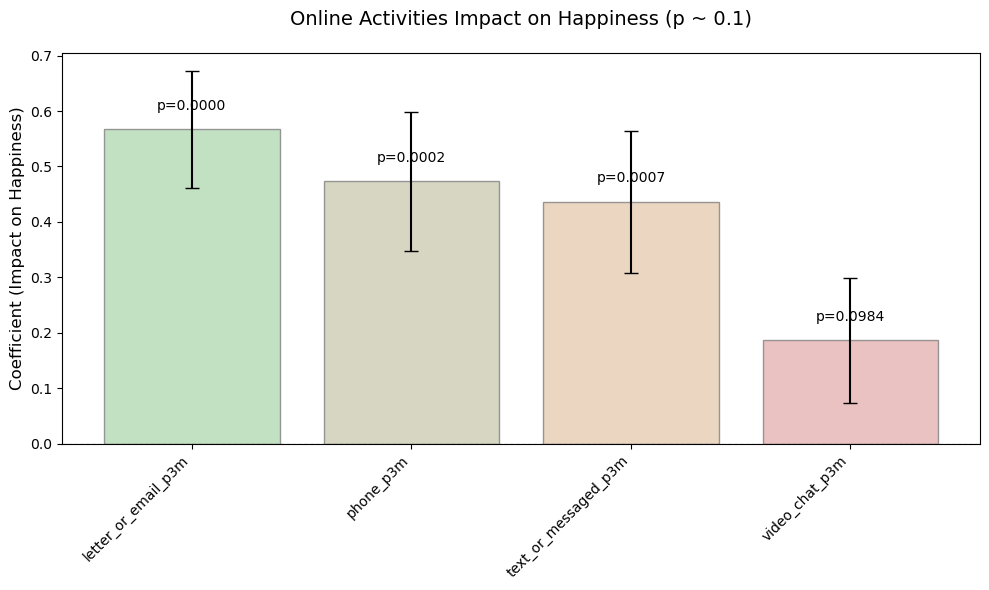

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# Updated data based on the regression results
# Filtering for activities with p-value < 0.2
variables = [
    "letter_or_email_p3m", 
    "phone_p3m", 
    "text_or_messaged_p3m", 
    "video_chat_p3m"
]
coefficients = [0.5668, 0.4732, 0.4360, 0.1865]
std_errors = [0.1048, 0.1259, 0.1278, 0.1127]
p_values = [0.0000, 0.0002, 0.0007, 0.0984]

# Sort the data in descending order of coefficients
sorted_indices = np.argsort(coefficients)[::-1]
variables = [variables[i] for i in sorted_indices]
coefficients = [coefficients[i] for i in sorted_indices]
std_errors = [std_errors[i] for i in sorted_indices]
p_values = [p_values[i] for i in sorted_indices]

# Create a color gradient with very dim colors
def create_color_gradient(n):
    colors = [
        (0.7, 0.85, 0.7),   # Very dim sage green
        (0.8, 0.8, 0.7),    # Very dim olive green
        (0.9, 0.8, 0.7),    # Very dim light orange
        (0.9, 0.7, 0.7)     # Very dim soft coral
    ]
    return colors[:n]

# Create the plot
x_pos = np.arange(len(variables))
plt.figure(figsize=(10, 6))

# Use the color gradient
bar_colors = create_color_gradient(len(variables))
bars = plt.bar(x_pos, coefficients, yerr=std_errors, capsize=5, 
               color=bar_colors, edgecolor='gray', alpha=0.8)

plt.axhline(0, color='black', linewidth=0.8, linestyle='--')

# Add annotations for p-values on the bars
for bar, p_value in zip(bars, p_values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.03, 
             f"p={p_value:.4f}", ha='center', va='bottom', fontsize=10)

# Customize axes and title
plt.xticks(x_pos, variables, rotation=45, ha='right', fontsize=10)
plt.ylabel("Coefficient (Impact on Happiness)", fontsize=12)
plt.title("Online Activities Impact on Happiness (p ~ 0.1)", fontsize=14, pad=20)
plt.tight_layout()

# Show the plot
plt.show()

# Offline Interaction Multiple Linear Regression


### (Having done No Connection Activity as Baseline)

In [14]:
Offline_dependent_variables['WELLNESS_subjective_happiness'] = independent_variables['WELLNESS_subjective_happiness_scale_score']

# Define the linear regression formula
# We are predicting WELLNESS_subjective_happiness from all the independent variables in Online_dependent_variables

No_Offline_Model = 'WELLNESS_subjective_happiness ~ ' + ' + '.join(
    [f"C({col}, Treatment(reference='NAFreq'))" for col in Offline_dependent_variables.columns[:-1]]
)

# Fit the model using OLS
model = smf.ols(No_Offline_Model, data=Offline_dependent_variables)
model_fit = model.fit()

# Print the summary of the fitted model
print(model_fit.summary2())


                                     Results: Ordinary least squares
Model:                       OLS                                    Adj. R-squared:              0.136    
Dependent Variable:          WELLNESS_subjective_happiness          AIC:                         2750.0733
Date:                        2024-11-29 03:07                       BIC:                         2792.2010
No. Observations:            797                                    Log-Likelihood:              -1366.0  
Df Model:                    8                                      F-statistic:                 16.64    
Df Residuals:                788                                    Prob (F-statistic):          6.29e-23 
R-squared:                   0.145                                  Scale:                       1.8247   
----------------------------------------------------------------------------------------------------------
                                                             Coef.  Std.Err

/tmp/ipykernel_70/555446475.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Offline_dependent_variables['WELLNESS_subjective_happiness'] = independent_variables['WELLNESS_subjective_happiness_scale_score']


Significant Variables:

    talked_family_p3m (p-value = 0.0000, Coefficient = 0.6876): In the PAST THREE MONTH, how often have you... - talked to someone about how your / their family was?

    hug_p3m (p-value = 0.0000, Coefficient = 0.4898): In the PAST THREE MONTH, how often have you... - hugged someone?
    coffee_p3m (p-value = 0.0024, Coefficient = 0.3322): In the PAST THREE MONTH, how often have you... - met someone for a meal, drink, dessert, or cup of coffee?


Ranking by Significance Using coefficients as a measure of impact: 

    talked_family_p3m (Coefficient = 0.6876, strongest impact)
    hug_p3m (Coefficient = 0.4898)
    coffee_p3m (Coefficient = 0.3322)

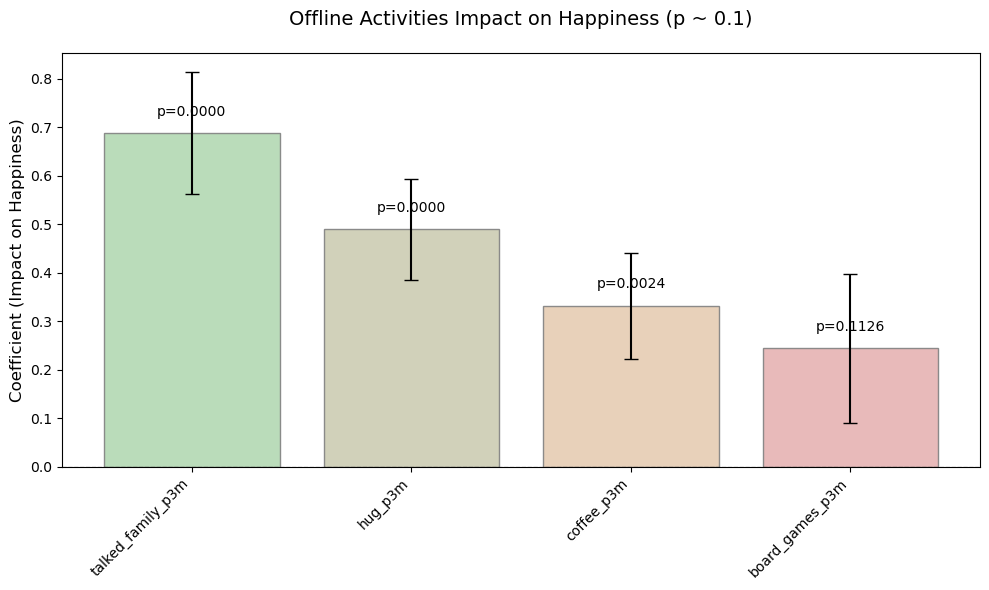

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Updated data based on the regression results
# Filtering for activities with p-value < 0.2
variables = [
    "talked_family_p3m", 
    "hug_p3m", 
    "coffee_p3m", 
    "board_games_p3m"
]
coefficients = [0.6876, 0.4898, 0.3322, 0.2441]
std_errors = [0.1257, 0.1043, 0.1090, 0.1537]
p_values = [0.0000, 0.0000, 0.0024, 0.1126]

# Sort the data in descending order of coefficients
sorted_indices = np.argsort(coefficients)[::-1]
variables = [variables[i] for i in sorted_indices]
coefficients = [coefficients[i] for i in sorted_indices]
std_errors = [std_errors[i] for i in sorted_indices]
p_values = [p_values[i] for i in sorted_indices]

# Create a color gradient from dim green to dim red
def create_color_gradient(n):
    colors = [
        (0.7, 0.85, 0.7),   # Very dim sage green
        (0.8, 0.8, 0.7),    # Very dim olive green
        (0.9, 0.8, 0.7),    # Very dim light orange
        (0.9, 0.7, 0.7)     # Very dim soft coral
    ]
    return colors[:n]

# Create the plot
x_pos = np.arange(len(variables))
plt.figure(figsize=(10, 6))

# Use the color gradient
bar_colors = create_color_gradient(len(variables))
bars = plt.bar(x_pos, coefficients, yerr=std_errors, capsize=5, 
               color=bar_colors, edgecolor='gray', alpha=0.9)

plt.axhline(0, color='black', linewidth=0.8, linestyle='--')

# Add annotations for p-values on the bars
for bar, p_value in zip(bars, p_values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.03, 
             f"p={p_value:.4f}", ha='center', va='bottom', fontsize=10)

# Customize axes and title
plt.xticks(x_pos, variables, rotation=45, ha='right', fontsize=10)
plt.ylabel("Coefficient (Impact on Happiness)", fontsize=12)
plt.title("Offline Activities Impact on Happiness (p ~ 0.1)", fontsize=14, pad=20)
plt.tight_layout()

# Show the plot
plt.show()